In [ ]:

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#Importing the dataset from keras datasets

from keras.datasets import mnist

(train_data,train_target),(test_data,test_target)=mnist.load_data()

In [ ]:
#Checking wether it is the same dataset

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)



(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


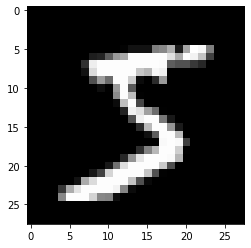

In [ ]:


plt.imshow(train_data[0],cmap='gray')
plt.show()


In [ ]:
#Categorical Conversion of the data

from keras.utils import np_utils

new_train_target=np_utils.to_categorical(train_target)
new_test_target=np_utils.to_categorical(test_target)

In [ ]:
#printing the first 30 values of converted data
print(train_target[:30])
print(new_train_target[:30])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 

In [ ]:


new_train_data=train_data/255
new_test_data=test_data/255

In [ ]:

from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))


model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(new_train_data,new_train_target,epochs=250)

Epoch 1/250
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3132 - accuracy: 0.9481
Epoch 2/250
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3073 - accuracy: 0.9484
Epoch 3/250
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3080 - accuracy: 0.9475
Epoch 4/250
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3007 - accuracy: 0.9497
Epoch 5/250
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3016 - accuracy: 0.9488
Epoch 6/250
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2976 - accuracy: 0.9488
Epoch 7/250
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2935 - accuracy: 0.9503
Epoch 8/250
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2932 - accuracy: 0.9495
Epoch 9/250
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2892 - accuracy: 0.9514
Epoch 10/250
1875/1875 [==============================] - 18s

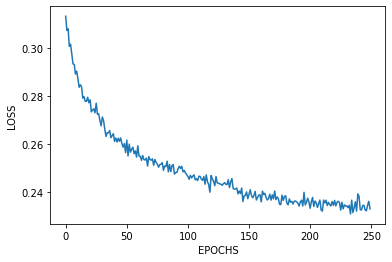

In [ ]:


plt.plot(model.history.history['loss'])
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

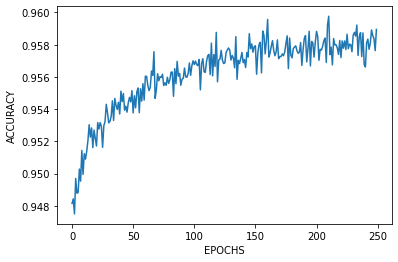

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

In [ ]:

model.evaluate(new_test_data,new_test_target)


313/313 [==============================] - 2s 6ms/step - loss: 0.1021 - accuracy: 0.9754


[0.10211017727851868, 0.9753999710083008]

In [ ]:


from keras.models import Sequential
from keras.layers import Dense,Flatten

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(500,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(500,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


model.fit(new_train_data,new_train_target,epochs=250)

Epoch 1/250
1875/1875 [==============================] - 20s 10ms/step - loss: 0.8717 - accuracy: 0.8995
Epoch 2/250
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4392 - accuracy: 0.9327
Epoch 3/250
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3831 - accuracy: 0.9410
Epoch 4/250
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3518 - accuracy: 0.9453
Epoch 5/250
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3402 - accuracy: 0.9457
Epoch 6/250
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3256 - accuracy: 0.9472
Epoch 7/250
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3169 - accuracy: 0.9477
Epoch 8/250
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3104 - accuracy: 0.9487
Epoch 9/250
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3096 - accuracy: 0.9484
Epoch 10/250
1875/1875 [==============================]

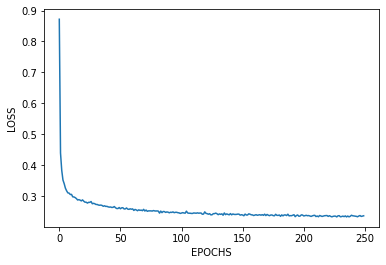

In [ ]:


plt.plot(model.history.history['loss'])
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()


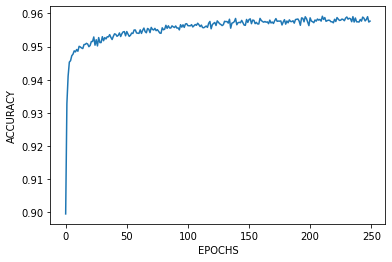

In [ ]:

plt.plot(model.history.history['accuracy'])
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

In [ ]:

model.evaluate(new_test_data,new_test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2194 - accuracy: 0.9638


[0.21944288909435272, 0.9638000130653381]